In [1]:
import numpy as np
import merg_rates3 as merg_rates
from progressbar import ProgressBar

In [2]:
import matplotlib as mpl 
mpl.use('Agg')
import matplotlib.pyplot as plt 
from matplotlib import rcParams
%matplotlib inline

rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['font.family'] = 'serif' 
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.grid']=True
rcParams['axes.titlesize']=24
rcParams['figure.titlesize']=24
rcParams['axes.labelsize']=20
rcParams['axes.titlepad']=15
rcParams['legend.frameon'] = True
rcParams['legend.facecolor']='white'
rcParams['legend.fontsize']=18

In [3]:
pertxt='P$\mathrm{\\acute{e}}$rez-Gonz$\mathrm{\\acute{a}}$lez'

In [4]:
htpm=merg_rates.HalTreepmClass(catkind='halo')

# in merg_rates3.HalTreepm():
  read /data1/arwetzel/lcdm250/snapshot.txt
  read  3914367 halo from halo_tree_00.dat
  read  3939586 halo from halo_tree_01.dat
  read  3964156 halo from halo_tree_02.dat
  read  3991148 halo from halo_tree_03.dat
  read  4017802 halo from halo_tree_04.dat
  read  4043082 halo from halo_tree_05.dat
  read  4068695 halo from halo_tree_06.dat
  read  4091273 halo from halo_tree_07.dat
  read  4114245 halo from halo_tree_08.dat
  read  4134906 halo from halo_tree_09.dat
  read  4156401 halo from halo_tree_10.dat
  read  4175240 halo from halo_tree_11.dat
  read  4191460 halo from halo_tree_12.dat
  read  4201253 halo from halo_tree_13.dat
  read  4207986 halo from halo_tree_14.dat
  read  4208029 halo from halo_tree_15.dat
  read  4202839 halo from halo_tree_16.dat
  read  4189843 halo from halo_tree_17.dat
  read  4168435 halo from halo_tree_18.dat
  read  4135114 halo from halo_tree_19.dat
  read  4092177 halo from halo_tree_20.dat
  read  4036281 halo fr

In [26]:
scat=0.
mmin=3.

mar_tpm=merg_rates.GalTreepmClass(htpm,
                                  source=merg_rates.bld_smf_compo('marchesini'),
                                  scat=scat,
                                  mmin=mmin)
per_tpm=merg_rates.GalTreepmClass(htpm,
                                  source=merg_rates.bld_smf_compo('perez'),
                                  scat=scat,
                                  mmin=mmin)
san_tpm=merg_rates.GalTreepmClass(htpm,
                                  source=merg_rates.bld_smf_compo('santini'),
                                  scat=scat,
                                  mmin=mmin)
fon_tpm=merg_rates.GalTreepmClass(htpm, 
                                  source=merg_rates.bld_smf_compo('fontana'),
                                  scat=scat, mmin=mmin)

tpms=[mar_tpm, per_tpm, san_tpm, fon_tpm]
for tpm in tpms:
    htpm.mp_tree(gal_tpm=tpm)
    htpm.merg_tree(gal_tpm=tpm)

running SHAM


100% |########################################################################|


running SHAM


100% |########################################################################|


running SHAM


100% |########################################################################|


running SHAM


100% |########################################################################|


building main progenitor tree:


100% |########################################################################|


building merger tree


building main progenitor tree:


100% |########################################################################|


building merger tree


building main progenitor tree:


100% |########################################################################|


building merger tree


building main progenitor tree:


100% |########################################################################|


building merger tree


# $\frac{dN}{dz}(z)$

In [9]:
def plt_dNdx_ofz(tpm, typ, dx, Mcond, smf_lbl, ziend=34, ylim=None,
                 xlim=None, xaxis='z', through=False, Mwid=0.5):     
    import importlib
    importlib.reload(merg_rates)
    htpm.dNdx_ofz=merg_rates.HalTreepmClass.dNdx_ofz.__get__(htpm, 
                                                             merg_rates.HalTreepmClass)
    %matplotlib inline
    
    dNdxs_gal_3=htpm.dNdx_ofz(galtpm=tpm, Mcond=Mcond, zi_Mcond=0,
                              mu_cond=np.log10(1./3.),
                              typ=typ, dx=dx,
                              ziend=ziend, through=through, x_ax=xaxis)
    dNdxs_gal_10=htpm.dNdx_ofz(galtpm=tpm, Mcond=Mcond, zi_Mcond=0,
                               mu_cond=np.log10(1./10.),
                               typ=typ, dx=dx,
                               ziend=ziend, through=through, x_ax=xaxis)

    fig=plt.figure(figsize=(8,6))
    ax=fig.add_subplot(111)
     
    ax.plot(dNdxs_gal_3[0], dNdxs_gal_3[1],
            label='$\mu\geq\\frac{1}{3}$', marker='d')
    ax.plot(dNdxs_gal_10[0], dNdxs_gal_10[1],
            label='$\mu\geq\\frac{1}{10}$', marker='d')
    
    if 'gal' in typ:
        objstr = 'galaxy'
    elif 'hal' in typ or typ=='host':
        objstr = 'halo'
    else:
        raise ValueError('Unexpected type')
    
    if dx=='dz':
        ax.set_ylabel('$\\frac{{dN}}{{{0}}}$ / [mergers / {1} / z]'.format(dx,
                                                                           objstr))
    elif dx=='dt':
        ax.set_ylabel('$\\frac{{dN}}{{{0}}}$ / [mergers / {1} / Gyr]'.format(dx,
                                                                             objstr))
    else:
        raise ValueError('unexpected dx')
    ax.set_yscale('log')
    if xaxis=='t':
        ax.set_xlabel('${0}$ / Gyr'.format(xaxis))
    else:
        ax.set_xlabel('${0}$'.format(xaxis))
    if tpm is None:
        ax.set_title('{0}'
                     '\n$M_0=10^{{{1:0.1f}\pm{2:0.2f}}}$ M$_\odot$'
                     .format(smf_lbl, Mcond, Mwid/2.))
    else:
        ax.set_title('{0}'
                     '\n$M_0=10^{{{1:0.1f}}\pm{{3:0.2f}}}$ M$_\odot$'
                     ', $\sigma={2:0.1f}$'.format(smf_lbl, Mcond, tpm.scat, Mwid/2.))   
    if ylim:
        ax.set_ylim(ylim[0],ylim[1])
    if xlim:
        ax.set_xlim(xlim[0],xlim[1])
    ax.legend()
    plt.show()
    
    return None

In [7]:
def panel_dNdx_ofz(ax, tpm, typ, dx, Mcond, ziend=34, x_ax='z',
                   Mwid=0.5):     
    dNdxs_gal_3=htpm.dNdx_ofz(galtpm=tpm, Mcond=Mcond, zi_Mcond=0,
                              mu_cond=np.log10(1./3.),
                              typ=typ, dx=dx,
                              ziend=ziend, x_ax=x_ax, Mwid=Mwid)
    dNdxs_gal_10=htpm.dNdx_ofz(galtpm=tpm, Mcond=Mcond, zi_Mcond=0,
                               mu_cond=np.log10(1./10.),
                               typ=typ, dx=dx,
                               ziend=ziend, x_ax=x_ax, Mwid=Mwid)

    ax.plot(dNdxs_gal_3[0],dNdxs_gal_3[1],
            label='$\mu=\\frac{1}{3}$', marker='d')
    ax.plot(dNdxs_gal_10[0],dNdxs_gal_10[1],
            label='$\mu=\\frac{1}{10}$', marker='d')
    if x_ax=='t':
        ax.set_xlabel('${0}$ / Gyr'.format(x_ax))
    else:
        ax.set_xlabel('${0}$'.format(x_ax))
    if dx=='dz':
        ax.set_ylabel('$\\frac{{dN}}{{{0}}}$ / [mergers / galaxy / z]'.format(dx))
    elif dx=='dt':
        ax.set_ylabel('$\\frac{{dN}}{{{0}}}$ / [mergers / galaxy / Gyr]'.format(dx))
    else:
        raise ValueError('unexpected dx')
    ax.yaxis.set_label_coords(x=-0.14,y=0.5)
    ax.set_yscale('log')
    
    return None

def fig_dNdx_ofz(tpm, typ, Mcond, smf_lbl, ziend=34, x_ax='z',
                 Mwid=0.5):
    
    fig = plt.figure(figsize=(12,5))
    
    ax1=fig.add_subplot(121)
    panel_dNdx_ofz(ax1, tpm, typ, dx='dz', Mcond=Mcond, ziend=ziend,
                   x_ax=x_ax, Mwid=Mwid)
    ax2=fig.add_subplot(122)
    panel_dNdx_ofz(ax2, tpm, typ, dx='dt', Mcond=Mcond, ziend=ziend,
                   x_ax=x_ax, Mwid=Mwid)
    
    y=0.91
    if tpm is None:
        plt.suptitle('{0}'
                     '\n$M_0=10^{{{1:0.1f}\pm{2:0.2f}}}$ M$_\odot$'
                     .format(smf_lbl, Mcond, Mwid/2.),
                     y=y, va='bottom')
    else:
        plt.suptitle('{0}'
                     '\n$M_0=10^{{{1:0.1f}\pm{3:0.2f}}}$ M$_\odot$'
                     ', $\sigma={2:0.1f}$'.format(smf_lbl, Mcond, 
                                                  tpm.scat, Mwid/2.),
                     y=y, va='bottom')
    fig.subplots_adjust(wspace=0.3)
    ax2.legend(fontsize=16)
    plt.show()
    
    return None

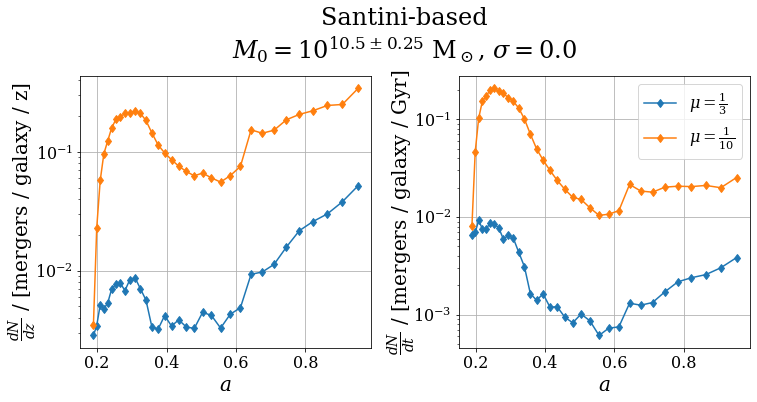

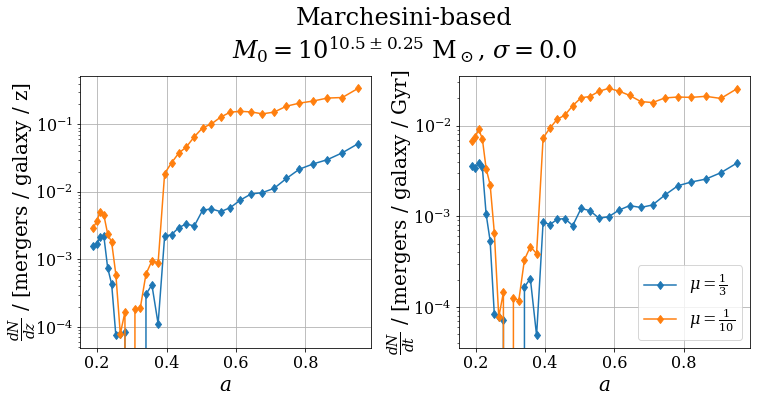

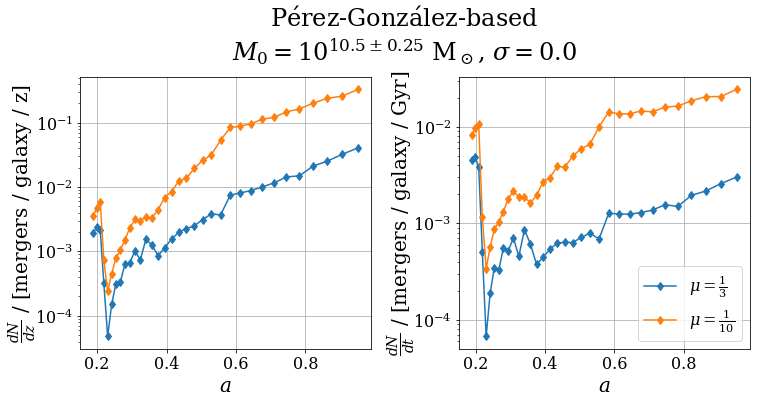

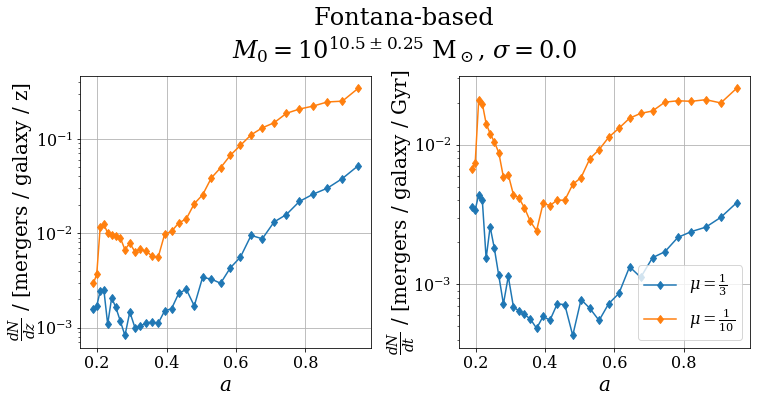

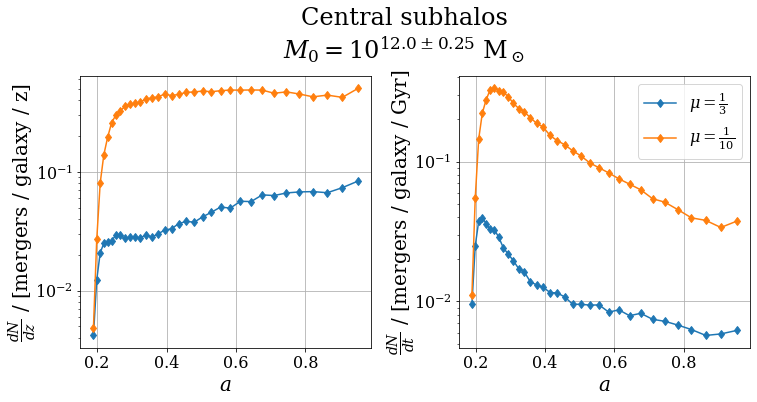

In [35]:
for tpm, lbl in zip([san_tpm, mar_tpm, per_tpm, fon_tpm],
                    ['Santini-based', 'Marchesini-based', pertxt+'-based', 'Fontana-based']):
    fig_dNdx_ofz(tpm, typ='cengal', Mcond=10.5, smf_lbl=lbl, ziend=34, x_ax='a')
fig_dNdx_ofz(tpm=None, typ='censubhal', Mcond=12., smf_lbl='Central subhalos', ziend=34, x_ax='a')

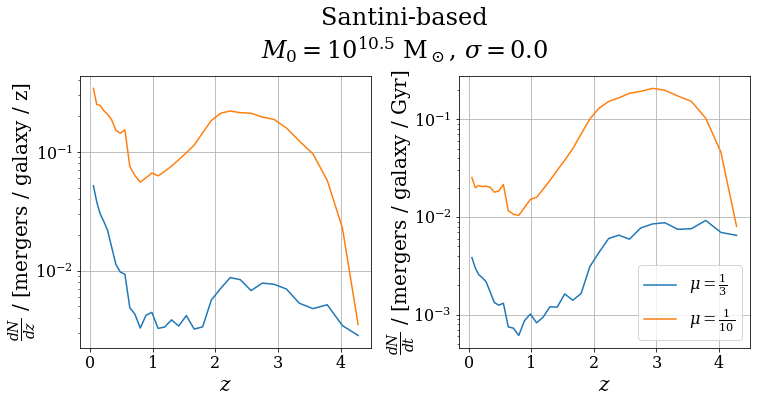

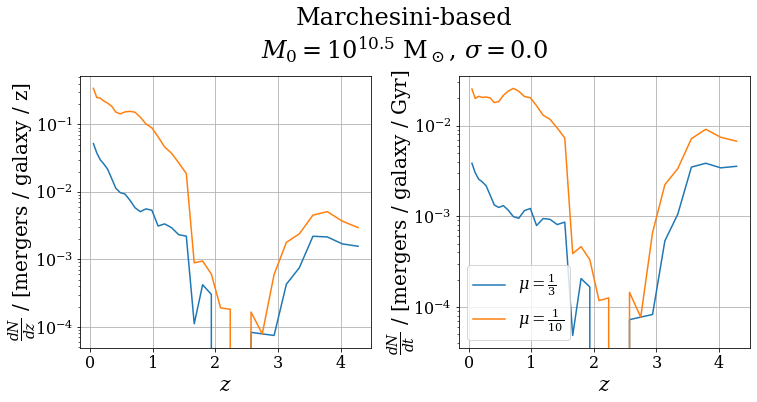

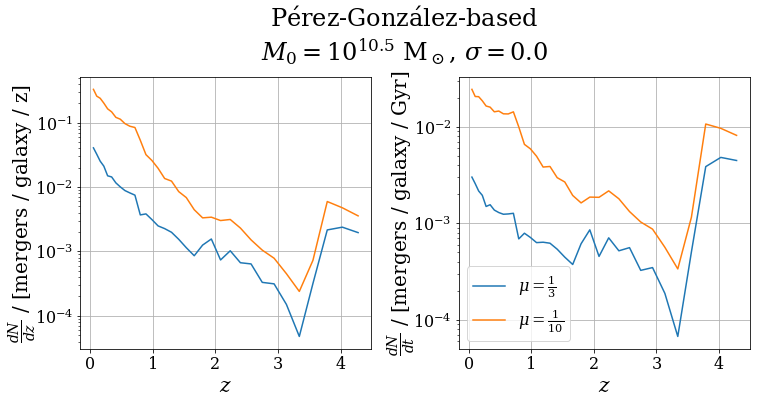

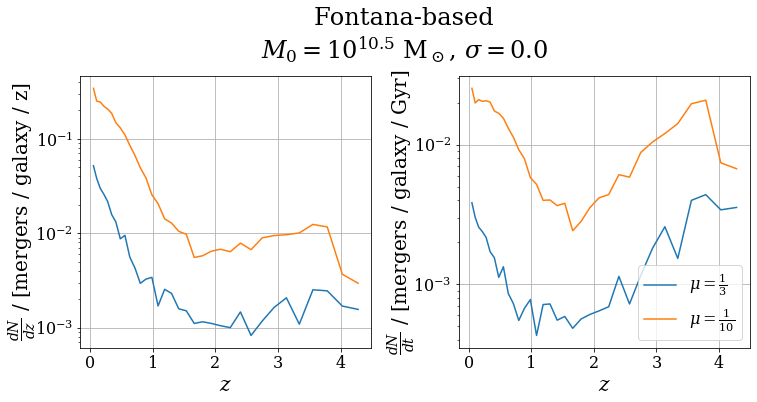

building main progenitor tree:


100% |########################################################################|


building merger tree


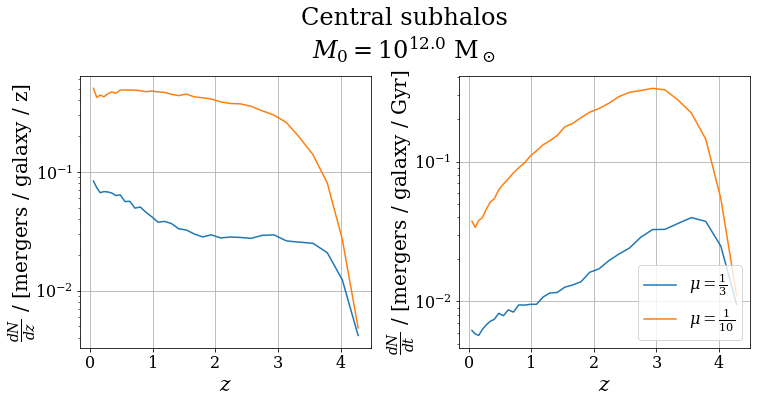

In [8]:
for tpm, lbl in zip([san_tpm, mar_tpm, per_tpm, fon_tpm],
                    ['Santini-based', 'Marchesini-based', pertxt+'-based', 'Fontana-based']):
    fig_dNdx_ofz(tpm, typ='cengal', Mcond=10.5, smf_lbl=lbl, ziend=34)
fig_dNdx_ofz(tpm=None, typ='censubhal', Mcond=12., smf_lbl='Central subhalos', ziend=34)

# Inspecting subhalos

/home/users/staudt/envs/mergerspython36env/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


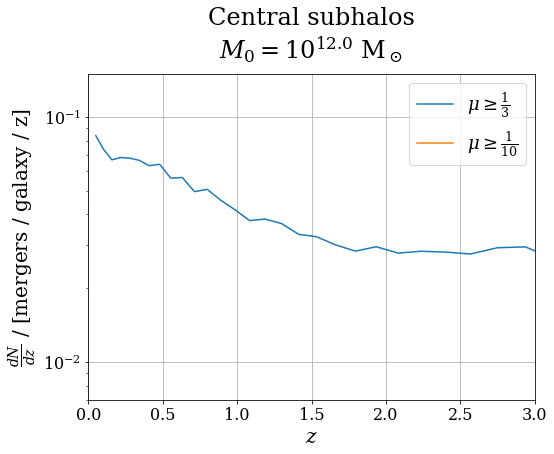

In [14]:
plt_dNdx_ofz(None, typ='censubhal', dx='dz', Mcond=12., 
             smf_lbl='Central subhalos', ziend=34, 
             ylim=[7e-3,1.5e-1], xlim=[0,3])

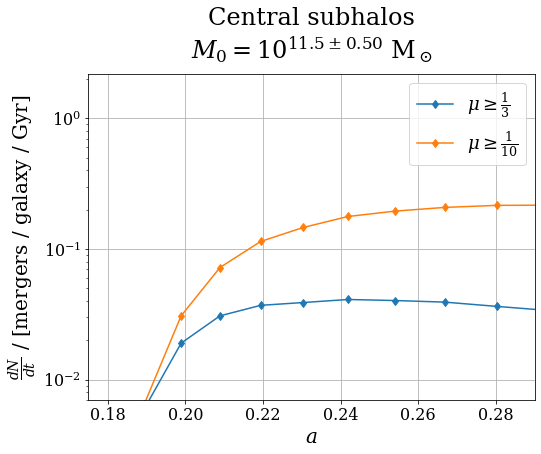

In [23]:
plt_dNdx_ofz(None, typ='censubhal', dx='dt', Mcond=11.5, 
             smf_lbl='Central subhalos', ziend=34, 
             ylim=[7e-3,2.2], xlim=[0.175,0.29], xaxis='a',
             through=False, Mwid=1.)

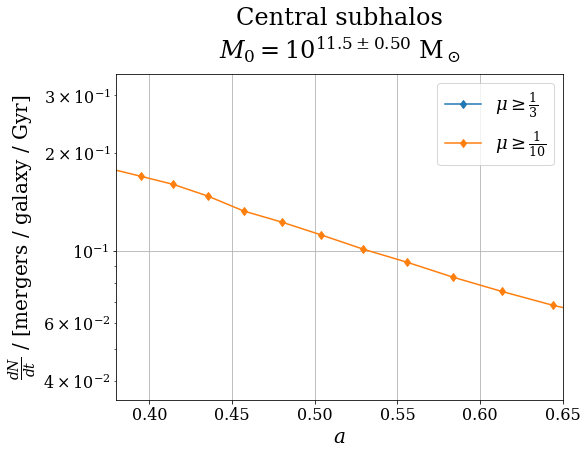

In [22]:
plt_dNdx_ofz(None, typ='censubhal', dx='dt', Mcond=11.5,
             Mwid=1.,
             smf_lbl='Central subhalos', ziend=34, 
             ylim=[3.5e-2,0.35], xlim=[0.38,0.65], xaxis='a',
             through=False)

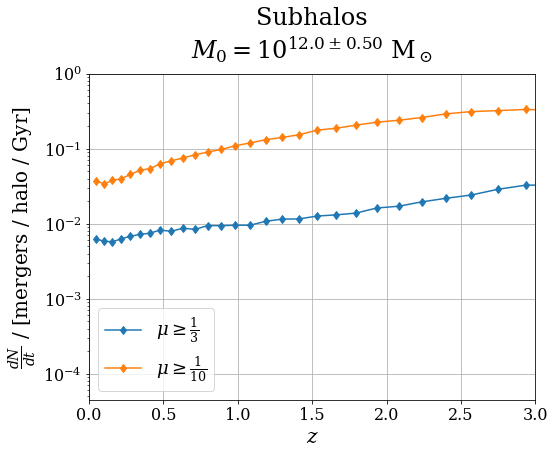

In [45]:
plt_dNdx_ofz(None, typ='subhal', dx='dt', Mcond=12.,
             Mwid=1.,
             smf_lbl='Subhalos', ziend=34, 
             ylim=[4.5e-5,1], xlim=[0.,3], xaxis='z',
             through=False)

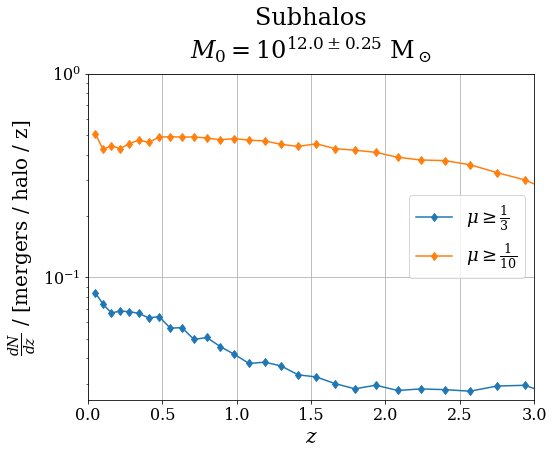

In [13]:
plt_dNdx_ofz(None, typ='subhal', dx='dz', Mcond=12.,
             Mwid=.5,
             smf_lbl='Subhalos', ziend=34, 
             ylim=[2.5e-2,1.], xlim=[0.,3], xaxis='z',
             through=False)

# Inspecting host halos

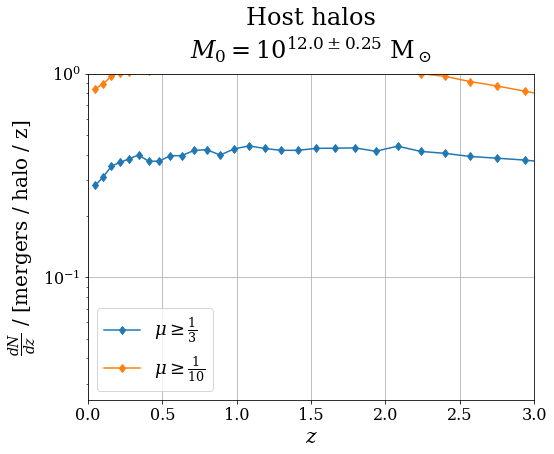

In [10]:
plt_dNdx_ofz(None, typ='host', dx='dz', Mcond=12.,
             Mwid=.5,
             smf_lbl='Host halos', ziend=34, 
             ylim=[2.5e-2,1.], xlim=[0.,3], xaxis='z',
             through=False)

# Snapshot of everything

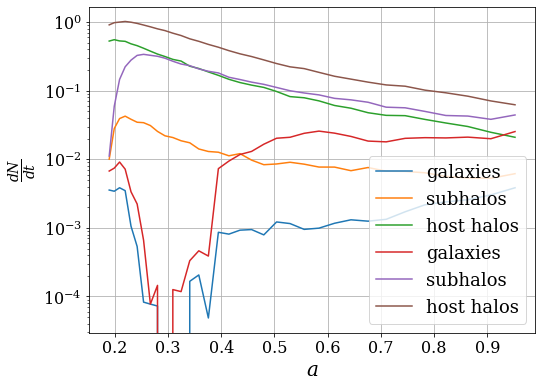

In [43]:
def plt_all(dx,x_ax):
    fig=plt.figure(figsize=(8,6))
    ax=fig.add_subplot(111)

    def rat(ax,mu):
        xs_gal,dNdxs_gal=htpm.dNdx_ofz(10.5,mu,
                                       'cengal',dx=dx,
                                       galtpm=mar_tpm, ziend=34, x_ax=x_ax)
        xs_sub,dNdxs_sub=htpm.dNdx_ofz(12.,mu,
                                       'censubhal',dx=dx,ziend=34, x_ax=x_ax)
        xs_host,dNdxs_host=htpm.dNdx_ofz(12.,mu,'host',
                                         dx=dx,ziend=34, x_ax=x_ax)
        ax.plot(xs_gal,dNdxs_gal,
                label='galaxies')
        ax.plot(xs_sub,dNdxs_sub,
                label='subhalos')
        ax.plot(xs_host,dNdxs_host,
                label='host halos')
        return None
    rat(ax, mu=np.log10(1./3.))
    rat(ax, mu=np.log10(1./10.))

    ax.set_xlabel('${0}$'.format(x_ax))
    ax.set_ylabel('$\\frac{{dN}}{{{0}}}$'.format(dx))
    ax.set_yscale('log')
    ax.legend()
    plt.show()
    return None

plt_all(dx='dt', x_ax='a')

In [43]:
zs=np.array([htpm.subcat.snap[zi][1] for zi in range(35)])
zwids=zs[1:]-zs[:-1]
a_s=np.array([htpm.subcat.snap[zi][0] for zi in range(35)])
lnas=np.log(a_s)
lnawids=lnas[1:]-lnas[:-1]
twids=np.array([htpm.subcat.snap[zi][3] for zi in range(35)])

info=np.array([[zwid,twid] for zwid,twid in zip(zwids,twids[:-1])])

In [44]:
lnawids

array([-0.04898019, -0.04885321, -0.04892799, -0.04901022, -0.04885098,
       -0.04894346, -0.0489243 , -0.04907185, -0.04880494, -0.04902324,
       -0.04897773, -0.0487988 , -0.04903305, -0.04897904, -0.04879022,
       -0.04910272, -0.04887766, -0.04897398, -0.04895908, -0.04881549,
       -0.04908299, -0.0486784 , -0.04901028, -0.04894423, -0.04908144,
       -0.04875612, -0.04900444, -0.04916489, -0.04880989, -0.0487076 ,
       -0.04892027, -0.04904091, -0.04905343, -0.04894102], dtype=float32)

In [40]:
print(np.std(zwids)/np.mean(zwids))
print(np.std(twids)/np.mean(twids))

0.46967858
0.53353775


In [21]:
htpm.subcat.snap.T

array([(1.    , 0.    , 13.8099, 0.6771, 13.9683),
       (0.9522, 0.0502, 13.1328, 0.6604, 13.6749),
       (0.9068, 0.1028, 12.4724, 0.6453, 13.358 ),
       (0.8635, 0.1581, 11.8271, 0.6291, 13.0167),
       (0.8222, 0.2162, 11.198 , 0.6087, 12.6516),
       (0.783 , 0.2771, 10.5893, 0.5905, 12.2662),
       (0.7456, 0.3412,  9.9988, 0.57  , 11.8603),
       (0.71  , 0.4085,  9.4289, 0.5505, 11.4373),
       (0.676 , 0.4793,  8.8783, 0.5259, 10.9984),
       (0.6438, 0.5533,  8.3525, 0.506 , 10.5505),
       (0.613 , 0.6313,  7.8464, 0.483 , 10.0925),
       (0.5837, 0.7132,  7.3635, 0.4587,  9.6304),
       (0.5559, 0.7989,  6.9048, 0.4382,  9.1687),
       (0.5293, 0.8893,  6.4665, 0.4152,  8.7068),
       (0.504 , 0.9841,  6.0513, 0.3916,  8.2507),
       (0.48  , 1.0833,  5.6597, 0.3724,  7.8042),
       (0.457 , 1.1882,  5.2873, 0.3496,  7.3652),
       (0.4352, 1.2978,  4.9378, 0.3298,  6.9407),
       (0.4144, 1.4131,  4.608 , 0.3099,  6.5296),
       (0.3946, 1.5342,  4.298 